# Perceptron Learning Rule

### Imports

In [43]:
# Necessities
import numpy as np
import matplotlib.pyplot as plt

from plotting_functions import plot_pairs

# Dataset
import opendatasets as od
import pandas as pd
from sklearn.model_selection import train_test_split

### Dataset load and exploration

In [44]:
#  Download fresh dataset from Kaggle

# Kaggle url for UCI banknote ID dataset
#data_url = "https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data"

# Download
#od.download(data_url)


In [45]:
# Load data from directory
data_dir = "./datasets/"
data_name = "BankNote_Authentication.csv"

df = pd.read_csv(data_dir + data_name)

In [46]:
# Some basic metrics
print("Head and tail")
print(df.head(5)); print("\n")
print(df.tail(5)); print("\n")

print("Pandas info")
print(df.info()); print("\n")

Head and tail
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


      variance  skewness  curtosis  entropy  class
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1


Pandas info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64

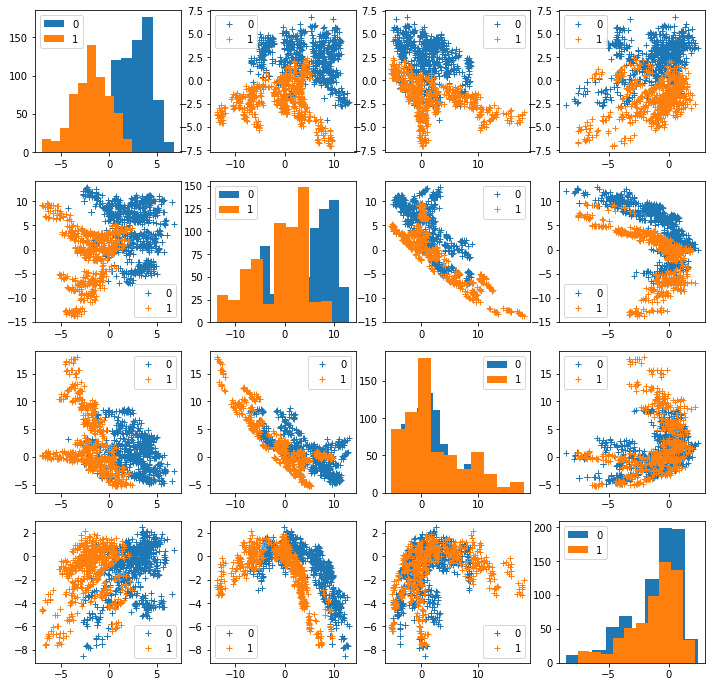

In [47]:
plot_pairs.plot_pairs(df, 12)

### Data splitting

In [48]:
# x, y split
x = df.drop("class", axis=1)
y = df["class"]
#print("patterns\n"); print(x.head(5)); print("\n")
#print("targets\n"); print(y.head(5))

In [49]:
# train, test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

#print(x_train.info())
#print(x_train.head(5)); print("\n")
#print(y_train.head(5))

### Network Functions

In [50]:
# Activation Functions

# Hardlim
def hardLim(X):
    return np.where(X < 0, 0, 1)

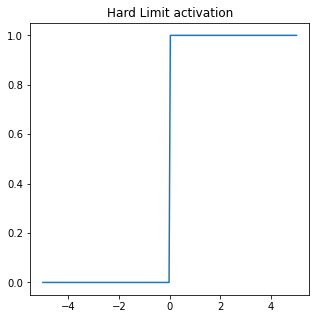

In [51]:
# visualise functions
x = np.linspace(start=-5, stop=5, num=200)

plt.figure(figsize = (5, 5))

y = hardLim(x)

plt.plot(x,y)
plt.gca().set_title("Hard Limit activation")
plt.show()

### Perceptron learning rule - 4-input single neuron

In [52]:
# Define perceptron
class perceptron():
    def __init__(self):
        self.weights = (np.dot((0.5-(-0.5)), np.random.rand(1, 4)) + (-0.5)).reshape(-1, 1)
        self.bias = 0.5
        self.f = hardLim
        self.training_record = []
        
    def feedForward(self,x):
        self.netinput = np.dot(x, self.weights) + self.bias
        activation = self.f(self.netinput)
        return activation
                
    def runTraining(self, x_train, y_train, max_epoch):
        
        # Loop passes through entire training set
        for epoch in range(max_epoch):
            
            # Count misclassified examples 
            training_recordTemp = 0
            
            # Loop through patterns
            for i in range(len(x_train)):
                
                # Get p and t
                p = x_train.iloc[i,:].to_numpy(); t = y_train.iloc[i]
                
                # Find activation
                a = self.feedForward(p)
                
                # Find error
                e = t - a
                
                # If error is NOT zero apply weight and bias update rules
                if(e):
                    # Update training record
                    training_recordTemp += 1
                    
                    # Update w and b (according to Hagan, et al.)
                    self.weights = np.add(self.weights, (e * p).reshape(-1,1))
                    self.bias = self.bias + e
            
            # Append to training record        
            self.training_record.append(training_recordTemp) 
            
    def testNetwork(self, x_test, y_test):
        # Define output
        percentOut = 0
        
        # Loop through patterns
        for i in range(len(x_test)):
        
            # Get p and t
            p = x_test.iloc[i,:].to_numpy(); t = y_test.iloc[i]
                
            # Find activation
            a = self.feedForward(p)
            
            # Check against target
            if (a != t):
                percentOut += 1          
        
        # Convert
        percentOut = (percentOut / len(x_test)) * 100
        
        return percentOut            

In [53]:
# Create perceptron instance
banknotePerceptron = perceptron()

In [54]:
# Train banknote perceptron
banknotePerceptron.runTraining(x_train, y_train, 100)

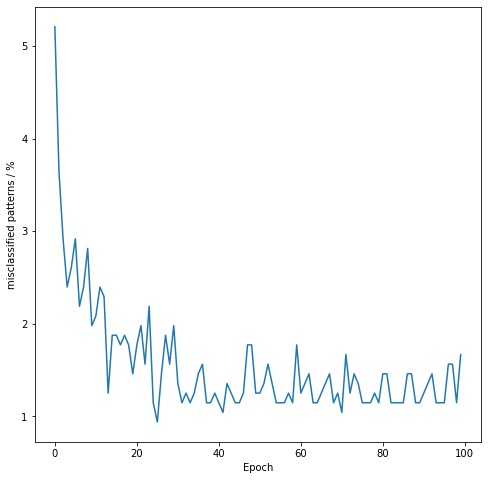

In [55]:
# Plot training record
plt.figure(figsize=(8, 8))

# Training record to percentage
scaledRecord= [(x / len(x_train))*100 for x in banknotePerceptron.training_record]

plt.plot(range(len(banknotePerceptron.training_record)),scaledRecord)
plt.gca().set_title("")
plt.xlabel("Epoch")
plt.ylabel("misclassified patterns / %")
plt.show()


In [56]:
# Test on hold-out set
test_result = banknotePerceptron.testNetwork(x_test, y_test)
print(str(test_result) + " % of patterns misclassifed")


1.4563106796116505 % of patterns misclassifed


### Single neuron perceptron on Iris dataset (linearly seperable)

In [57]:
# Load data from directory
data_dir = "./datasets/"
data_name = "Iris_Identification.csv"

df2 = pd.read_csv(data_dir + data_name)

In [58]:
# Some basic metrics
print("Head and tail")
print(df2.head(5)); print("\n")
print(df2.tail(5)); print("\n")

print("Pandas info")
print(df2.info()); print("\n")

Head and tail
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


Pandas info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        ------

In [59]:
# Grab linearly seperable examples and encode species column
df2 = df2.iloc[:100]

df2["species"] = np.where(df2["species"] =="setosa", 0, 1)

# Some basic metrics
print("Head and tail")
print(df2.head(5)); print("\n")
print(df2.tail(5)); print("\n")

print("Pandas info")
print(df2.info()); print("\n")

Head and tail
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


    sepal_length  sepal_width  petal_length  petal_width  species
95           5.7          3.0           4.2          1.2        1
96           5.7          2.9           4.2          1.3        1
97           6.2          2.9           4.3          1.3        1
98           5.1          2.5           3.0          1.1        1
99           5.7          2.8           4.1          1.3        1


Pandas info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  ---

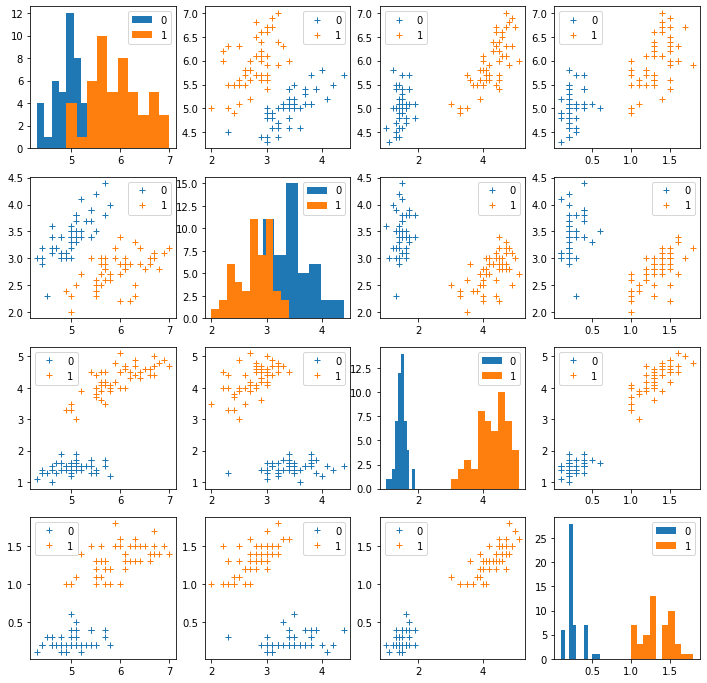

In [60]:
plot_pairs.plot_pairs(df2, 12)

### Prepare data

In [61]:
# x, y split
x = df2.drop("species", axis=1)
y = df2["species"]

print("patterns\n"); print(x.head(5)); print("\n")
print("targets\n"); print(y.head(5))

# train, test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.info())
print(x_train.head(5)); print("\n")
print(y_train.head(5))



patterns

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


targets

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 27 to 77
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  70 non-null     float64
 1   sepal_width   70 non-null     float64
 2   petal_length  70 non-null     float64
 3   petal_width   70 non-null     float64
dtypes: float64(4)
memory usage: 2.7 KB
None
    sepal_length  sepal_width  petal_length  petal_width
27           5.2          3.5           1.5          0.2
53           5.5          2.3           4.0          1.3
60 

### Define and train

In [62]:
# Create perceptron instance
irisPerceptron = perceptron()

irisPerceptron.runTraining(x_train, y_train, 10)


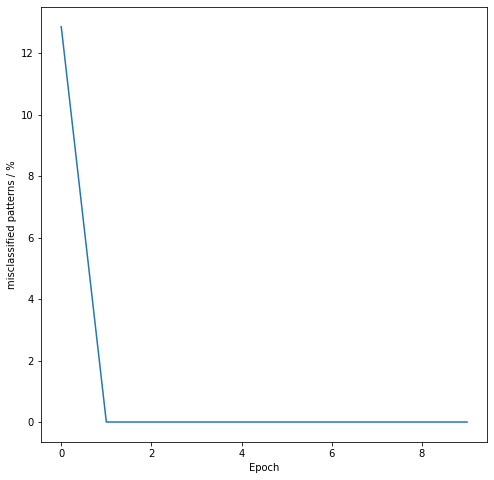

In [63]:
# Plot training record
plt.figure(figsize=(8, 8))

# Training record to percentage
scaledRecord= [(x / len(x_train))*100 for x in irisPerceptron.training_record]

plt.plot(range(len(irisPerceptron.training_record)),scaledRecord)
plt.gca().set_title("")
plt.xlabel("Epoch")
plt.ylabel("misclassified patterns / %")
plt.show()

In [64]:
# Test on hold-out set
test_result = irisPerceptron.testNetwork(x_test, y_test)
print(str(test_result) + " % of patterns misclassifed")


0.0 % of patterns misclassifed
